# Food Delivery Analysis

## Import Packages

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [8]:
df = pd.read_excel('call-center_restaurant-orders-mv0x6oRrEEfBDJzn.xlsx')

## Exploring DataFrame

In [10]:
df

,Date,Time customer placed order,Time order placed at restaurant,Time driver arrived at restaurant,Delivery time,Driver ID,Driver Name,Restaurant ID,Customer ID,Delivery Area,ASAP,Sub Total,Delivery fee,Service fee,Discount,Tip,Refunded amount
0,2020-01-01,02:52:12,03:00:25,03:08:09,03:35:20,9329,Christy,7263,1143515,Fremont,Yes,$21.39,$0.43,$3.83,$2.00,$1.40,$0.00
1,2020-01-01,15:58:57,17:56:45,18:24:39,18:57:01,9175,Elizabeth,7247,1136820,Hayward,Yes,$99.74,$6.05,$2.30,$2.00,$11.03,$0.00
2,2020-01-01,19:02:37,19:12:51,19:19:59,19:31:09,9051,Janet,7293,1081871,Hayward,Yes,$21.97,$2.74,$2.39,$8.00,$4.31,$0.00
3,2020-01-01,04:01:57,04:08:18,04:13:02,04:37:57,9389,Jacquelyn,7046,1128255,Union City,Yes,$32.79,$0.12,$2.55,$2.00,$8.55,$0.00
4,2020-01-01,23:46:38,23:49:32,23:54:29,00:37:15,9187,Lauren,7385,1051183,Hayward,Yes,$67.56,$3.77,$3.35,$2.00,$8.82,$0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72309,2020-04-30,07:38:34,07:41:28,NaN,08:30:50,9172,Jocelyn,7051,1185143,Union City,No,$77.87,$10.25,$2.31,$2.00,$11.58,$0.00
72310,2020-04-30,07:43:46,08:12:28,08:43:37,09:04:46,9324,Tammy,7041,1001989,Hayward,Yes,$60.71,$0.74,$4.22,$2.00,$3.98,$0.00
72311,2020-04-30,06:12:39,06:57:05,07:25:08,07:55:46,9045,Mandy,7292,1122688,Union City,Yes,$120.38,$7.96,$2.55,$2.00,$6.40,$0.00
72312,2020-04-30,07:30:35,07:45:41,09:06:48,09:47:23,9430,Colleen,7278,1043599,Hayward,No,$100.65,$12.40,$5.20,$2.00,$6.58,$0.00


In [11]:
df.shape

(72314, 17)

In [12]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72314 entries, 0 to 72313
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               72314 non-null  datetime64[ns]
 1   Time customer placed order         72314 non-null  object        
 2   Time order placed at restaurant    72154 non-null  object        
 3   Time driver arrived at restaurant  54190 non-null  object        
 4   Delivery time                      72314 non-null  object        
 5   Driver ID                          72314 non-null  int64         
 6   Driver Name                        72314 non-null  object        
 7   Restaurant ID                      72314 non-null  int64         
 8   Customer ID                        72314 non-null  int64         
 9   Delivery Area                      72314 non-null  object        
 10  ASAP                              

In [13]:
df.isna().sum()

Date                                     0
Time customer placed order               0
Time order placed at restaurant        160
Time driver arrived at restaurant    18124
Delivery time                            0
Driver ID                                0
Driver Name                              0
Restaurant ID                            0
Customer ID                              0
Delivery Area                            0
ASAP                                     0
Sub Total                                0
Delivery fee                             0
Service fee                              0
Discount                                 0
Tip                                      0
Refunded amount                          0
dtype: int64

#### Number of Drivers

In [15]:
df['Driver Name'].nunique()

432

#### Number of restaurants

In [17]:
df['Restaurant ID'].nunique()

408

#### Number of unique customers

In [19]:
df['Customer ID'].nunique()

6262

## Type Conversion

In [21]:
df['ASAP'] = df['ASAP'].map({'Yes': True, 'No': False})

In [22]:
df['Sub Total'] = df['Sub Total'].str.replace('[$,]', '', regex=True).astype(float)
df['Delivery fee'] = df['Delivery fee'].str.replace('[$,]', '', regex=True).astype(float)
df['Service fee'] = df['Service fee'].str.replace('[$,]', '', regex=True).astype(float)
df['Discount'] = df['Discount'].str.replace('[$,]', '', regex=True).astype(float)
df['Tip'] = df['Tip'].str.replace('[$,]', '', regex=True).astype(float)
df['Refunded amount'] = df['Refunded amount'].str.replace('[$,]', '', regex=True).astype(float)

In [23]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72314 entries, 0 to 72313
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               72314 non-null  datetime64[ns]
 1   Time customer placed order         72314 non-null  object        
 2   Time order placed at restaurant    72154 non-null  object        
 3   Time driver arrived at restaurant  54190 non-null  object        
 4   Delivery time                      72314 non-null  object        
 5   Driver ID                          72314 non-null  int64         
 6   Driver Name                        72314 non-null  object        
 7   Restaurant ID                      72314 non-null  int64         
 8   Customer ID                        72314 non-null  int64         
 9   Delivery Area                      72314 non-null  object        
 10  ASAP                              

<h3 style="color:lightskyblue">Conclusion: After convertion size reduced to half</h3>

In [25]:
df.iloc[:,11:].describe()

,Sub Total,Delivery fee,Service fee,Discount,Tip,Refunded amount
count,72314.000000,72314.000000,72314.000000,72314.000000,72314.000000,72314.000000
mean,93.844955,5.610922,3.474285,3.648726,9.494586,0.879774
std,95.809156,3.443500,1.388401,6.791021,10.862448,9.708033
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,47.420000,2.710000,2.330000,2.000000,3.510000,0.000000
50%,69.850000,5.400000,3.340000,2.000000,6.610000,0.000000
75%,106.990000,8.130000,4.520000,3.000000,11.740000,0.000000
max,3593.410000,13.660000,6.840000,261.000000,469.050000,940.400000


## Data Cleaning

In [27]:
df.duplicated().sum()

0

In [28]:
df.isna().sum()

Date                                     0
Time customer placed order               0
Time order placed at restaurant        160
Time driver arrived at restaurant    18124
Delivery time                            0
Driver ID                                0
Driver Name                              0
Restaurant ID                            0
Customer ID                              0
Delivery Area                            0
ASAP                                     0
Sub Total                                0
Delivery fee                             0
Service fee                              0
Discount                                 0
Tip                                      0
Refunded amount                          0
dtype: int64

In [29]:
df[df.isnull().any(axis=1)]

,Date,Time customer placed order,Time order placed at restaurant,Time driver arrived at restaurant,Delivery time,Driver ID,Driver Name,Restaurant ID,Customer ID,Delivery Area,ASAP,Sub Total,Delivery fee,Service fee,Discount,Tip,Refunded amount
8,2020-01-01,22:45:41,23:22:33,NaN,23:49:14,9034,Bethany,7286,1052229,Hayward,False,46.96,5.39,1.84,2.0,3.42,0.0
11,2020-01-01,04:58:55,04:59:31,NaN,05:24:01,9279,Ebony,7146,1179405,Hayward,True,53.30,4.73,1.98,2.0,8.17,0.0
13,2020-01-01,16:49:32,17:50:50,NaN,18:25:00,9383,Jennifer,7275,1067334,Union City,False,76.10,3.51,2.12,2.0,4.96,0.0
18,2020-01-01,19:21:54,19:25:02,NaN,20:32:06,9327,Janice,7262,1181283,Fremont,True,35.65,3.08,2.43,2.0,4.99,0.0
21,2020-01-01,02:32:46,02:36:38,NaN,03:30:03,9056,Joyce,7293,1125608,Union City,True,64.78,5.88,2.19,2.0,3.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72280,2020-04-30,04:15:54,04:23:15,NaN,05:09:03,9273,Heather,7037,1110162,Union City,True,130.13,7.80,5.82,2.0,21.00,0.0
72291,2020-04-30,08:49:52,09:07:54,NaN,10:05:57,9011,Mallory,7353,1006000,Hayward,True,191.89,7.97,2.92,2.0,32.11,0.0
72303,2020-04-30,03:55:11,03:57:17,NaN,04:56:21,9149,Wayne,7285,1006497,Hayward,True,99.55,3.47,3.28,2.0,5.15,0.0
72308,2020-04-30,06:55:28,07:41:24,NaN,09:15:27,9175,Elizabeth,7369,1172371,Hayward,True,91.15,3.41,1.95,2.0,5.94,0.0


## Helper function

In [31]:
from datetime import datetime, timedelta

def calculate_time_difference(order_placed_at, delivered_at):
    """Calculates the time difference between two time objects.
    Args:
        order_placed_at: The order_placed_at time object.
        delivered_at: The delivered_at time object.
    Returns:
        A float representing the time difference in hours.
    """

    current_date = datetime.now().date()
    order_datetime = datetime.combine(current_date, order_placed_at)
    delivery_datetime = datetime.combine(current_date, delivered_at)
    
    # Calculate time difference
    time_difference = delivery_datetime - order_datetime
    
    # Handle overnight deliveries
    if time_difference.total_seconds() < 0:
        delivery_datetime += timedelta(days=1)
        time_difference = delivery_datetime - order_datetime
    
    # Convert to hours
    hours_difference = time_difference.total_seconds() / 3600
    
    return round(hours_difference, 2)

In [32]:
def format_hours(decimal_hours):
    hours = int(decimal_hours)
    minutes = round((decimal_hours - hours) * 60)
    return f"{hours} hours and {minutes} minutes"

## Added required columns

In [34]:
### Calculates the total time needed to make delivery
df['time_taken_to_deliver'] = df.apply(lambda row: calculate_time_difference(row['Time customer placed order'], row['Delivery time']), axis=1)

In [35]:
### calaculated total sales from that order
df['sales'] = df['Sub Total']+df['Delivery fee']+df['Service fee']-df['Discount']+df['Refunded amount']

In [36]:
df['Tip Given'] = df['Tip'].apply(lambda x: 1 if x > 0 else 0)

## EDA

### Average delivery time


In [39]:
formatted_time = format_hours(df['time_taken_to_deliver'].mean())
print(formatted_time) 

2 hours and 18 minutes


### Total Revenue

In [41]:
np.round(df['sales'].sum(),2)

7243057.7

### Lost due to refuds

In [43]:
df['Refunded amount'].sum()

63620.0

### Average Order Value

In [45]:
round(df['sales'].sum()/df['Customer ID'].count(),2)

100.16

### Total Discount given

In [47]:
df['Discount'].sum()

263854.0

### Total tip

In [49]:
df['Tip'].sum()

686591.49

### Monthly Revenue Trend

In [51]:
monthly_trend = df.groupby(df['Date'].dt.to_period('M')).agg({'sales':'sum'})
monthly_trend

,sales
Date,
2020-01,1280898.52
2020-02,1750505.81
2020-03,1974445.67
2020-04,2237207.70


In [52]:
# plt.figure(figsize=(10, 6))  # Set the figure size
# monthly_trend.plot(kind='line', color='skyblue',marker='o',legend=False)
# plt.title('Monthly Sales Trend')
# plt.xlabel('Month')
# plt.ylabel('Sales')
# plt.xticks( ha='right')  # Rotate x-axis labels for better readability
# #plt.tight_layout()

# # Display the bar chart
# plt.show();

In [53]:
weekly_trend = df.groupby(df['Date'].dt.to_period('W')).agg({'sales':'sum'})
weekly_trend['sales'].iloc[-1]

311672.88

<Figure size 1000x600 with 0 Axes>

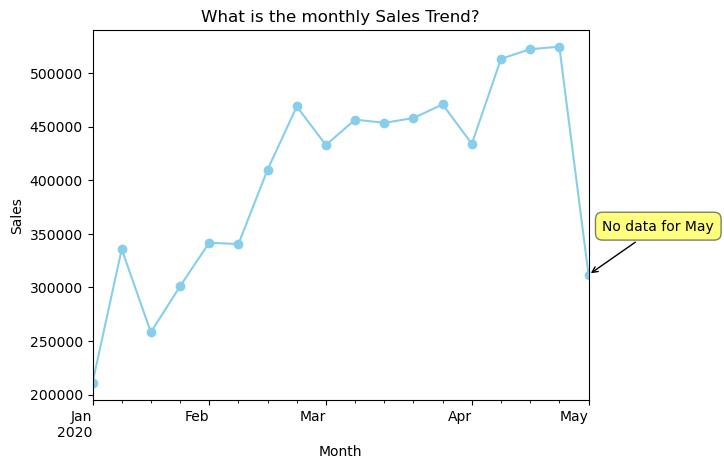

In [54]:
plt.figure(figsize=(10, 6))
weekly_trend.plot(kind='line', color='skyblue',marker='o',legend=False)
plt.title('What is the monthly Sales Trend?')
plt.xlabel('Month')
plt.annotate('No data for May', 
             xy=(weekly_trend.index[-1] , weekly_trend['sales'].iloc[-1]), 
             xytext=(10, 30),
             textcoords='offset points',
             ha='left',
             va='bottom',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
plt.ylabel('Sales')
plt.xticks( ha='right') 
plt.show();

In [55]:
weekly_delivery_time_trend = df.groupby(df['Date'].dt.to_period('W')).agg({'time_taken_to_deliver':'mean'})

<Figure size 1000x600 with 0 Axes>

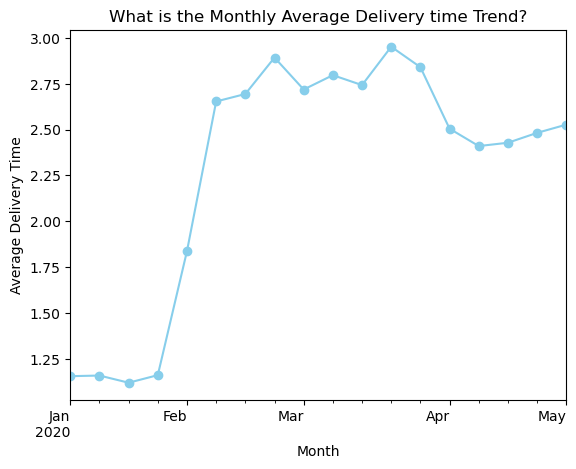

In [56]:
plt.figure(figsize=(10, 6)) 
weekly_delivery_time_trend.plot(kind='line', color='skyblue',marker='o',legend=False)
plt.title('What is the Monthly Average Delivery time Trend?')
plt.xlabel('Month')
plt.ylabel('Average Delivery Time')
plt.xticks( ha='right') 
plt.show();

In [57]:
weekly_refund_trend = df.groupby(df['Date'].dt.to_period('W')).agg({'Refunded amount':'sum'})

<Figure size 1000x600 with 0 Axes>

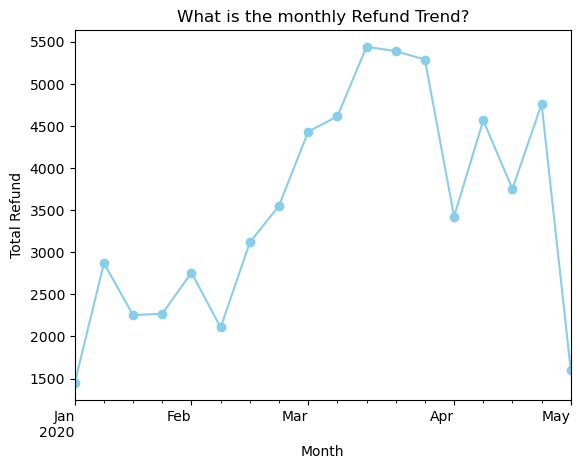

In [58]:
plt.figure(figsize=(10, 6))
weekly_refund_trend.plot(kind='line', color='skyblue',marker='o',legend=False)
plt.title('What is the monthly Refund Trend?')
plt.xlabel('Month')
plt.ylabel('Total Refund')
plt.xticks( ha='right')  
plt.show();

In [59]:
weekly_avg_order = df.groupby(df['Date'].dt.to_period('W')).agg({'sales':'sum','Customer ID': 'count'})
weekly_avg_order.rename(columns={'Customer ID': 'Number of customers'}, inplace=True)
weekly_avg_order['Average order value'] = weekly_avg_order['sales'] / weekly_avg_order['Number of customers']
md_weekly_avg_order = weekly_avg_order[['Average order value']] 

<Figure size 1200x600 with 0 Axes>

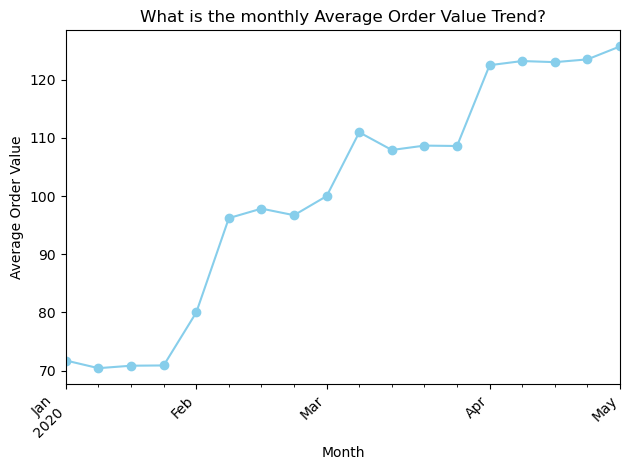

In [60]:
plt.figure(figsize=(12, 6))
md_weekly_avg_order.plot(kind='line', color='skyblue',marker='o',legend=False)
plt.title('What is the monthly Average Order Value Trend?')
plt.xlabel('Month')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h3 style="color:lightskyblue">Insight:</h3>
<h4>Sales is increasing each month.Average delivery time was decreasing but now it's increasing again. Refund is increasing with fluctuation.Average order value is increasing.</h4>

### Driver analysis

In [62]:
driver_totals = df.groupby(['Driver Name']).agg({'sales':'sum'}).sort_values('sales',ascending=False)[:20]

<Figure size 1000x600 with 0 Axes>

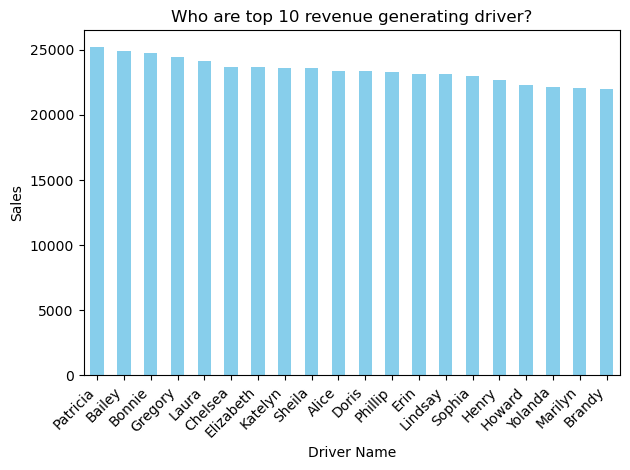

In [63]:
plt.figure(figsize=(10, 6))  
driver_totals.plot(kind='bar', color='skyblue',legend=False)
plt.title('Who are top 10 revenue generating driver?')
plt.xlabel('Driver Name')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [64]:
driver_delivery_time = df.groupby(['Driver Name']).agg({'time_taken_to_deliver':'mean'}).sort_values('time_taken_to_deliver')[:20]

<Figure size 1000x600 with 0 Axes>

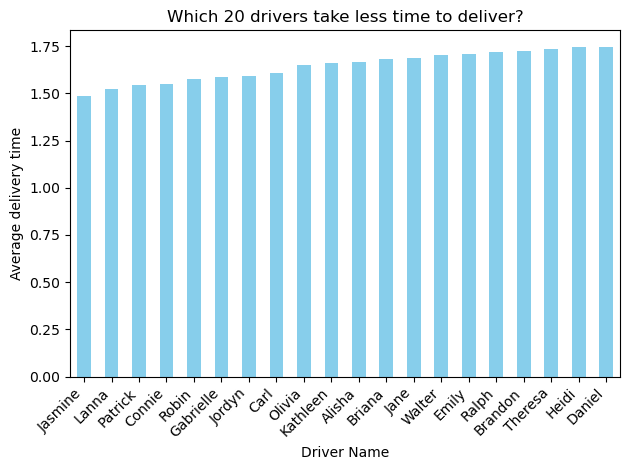

In [65]:
plt.figure(figsize=(10, 6))
driver_delivery_time.plot(kind='bar', color='skyblue',legend=False)
plt.title('Which 20 drivers take less time to deliver?')
plt.xlabel('Driver Name')
plt.ylabel('Average delivery time')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show();

In [66]:
driver_TIP_mean = df.groupby(['Driver Name']).agg({'Tip':'mean'}).sort_values('Tip', ascending=False)[:20]
driver_TIP_sum = df.groupby(['Driver Name']).agg({'Tip':'sum'}).sort_values('Tip', ascending=False)[:20]
driver_delivery = df.groupby(['Driver Name']).agg({'Tip':'count'}).sort_values('Tip', ascending=False)[:20]

<Figure size 2000x800 with 0 Axes>

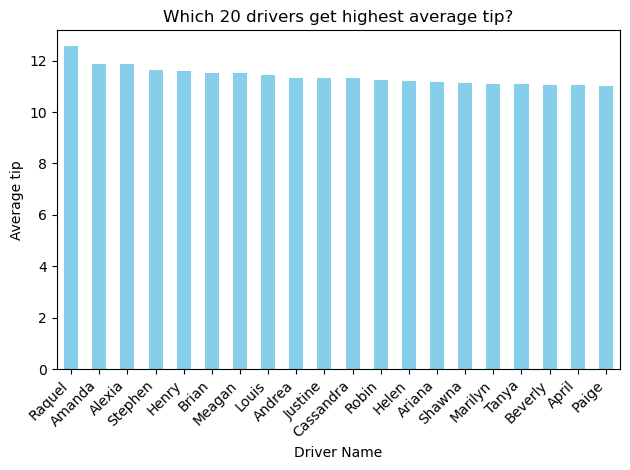

In [67]:
plt.figure(figsize=(20, 8))
driver_TIP_mean.plot(kind='bar', color='skyblue',legend=False)
plt.title('Which 20 drivers get highest average tip?')
plt.xlabel('Driver Name')
plt.ylabel('Average tip')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

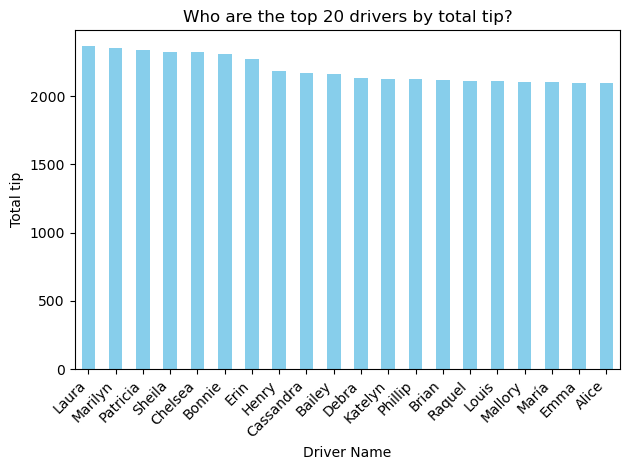

In [68]:
plt.figure(figsize=(20, 8))
driver_TIP_sum.plot(kind='bar', color='skyblue',legend=False)
plt.title('Who are the top 20 drivers by total tip?')
plt.xlabel('Driver Name')
plt.ylabel('Total tip')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

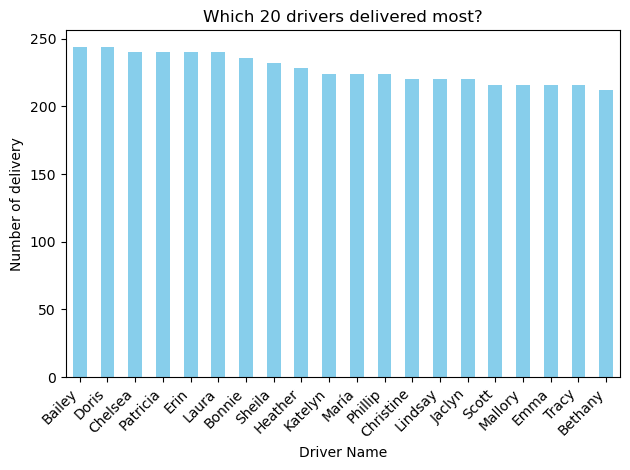

In [69]:
plt.figure(figsize=(20, 8))
driver_delivery.plot(kind='bar', color='skyblue',legend=False)
plt.title('Which 20 drivers delivered most?')
plt.xlabel('Driver Name')
plt.ylabel('Number of delivery')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [70]:
driver_tip_ratio = df.groupby('Driver Name').agg({'Tip Given':'sum','sales': 'count'})
driver_tip_ratio['Tip Ratio'] = driver_tip_ratio['Tip Given'] / driver_tip_ratio['sales']

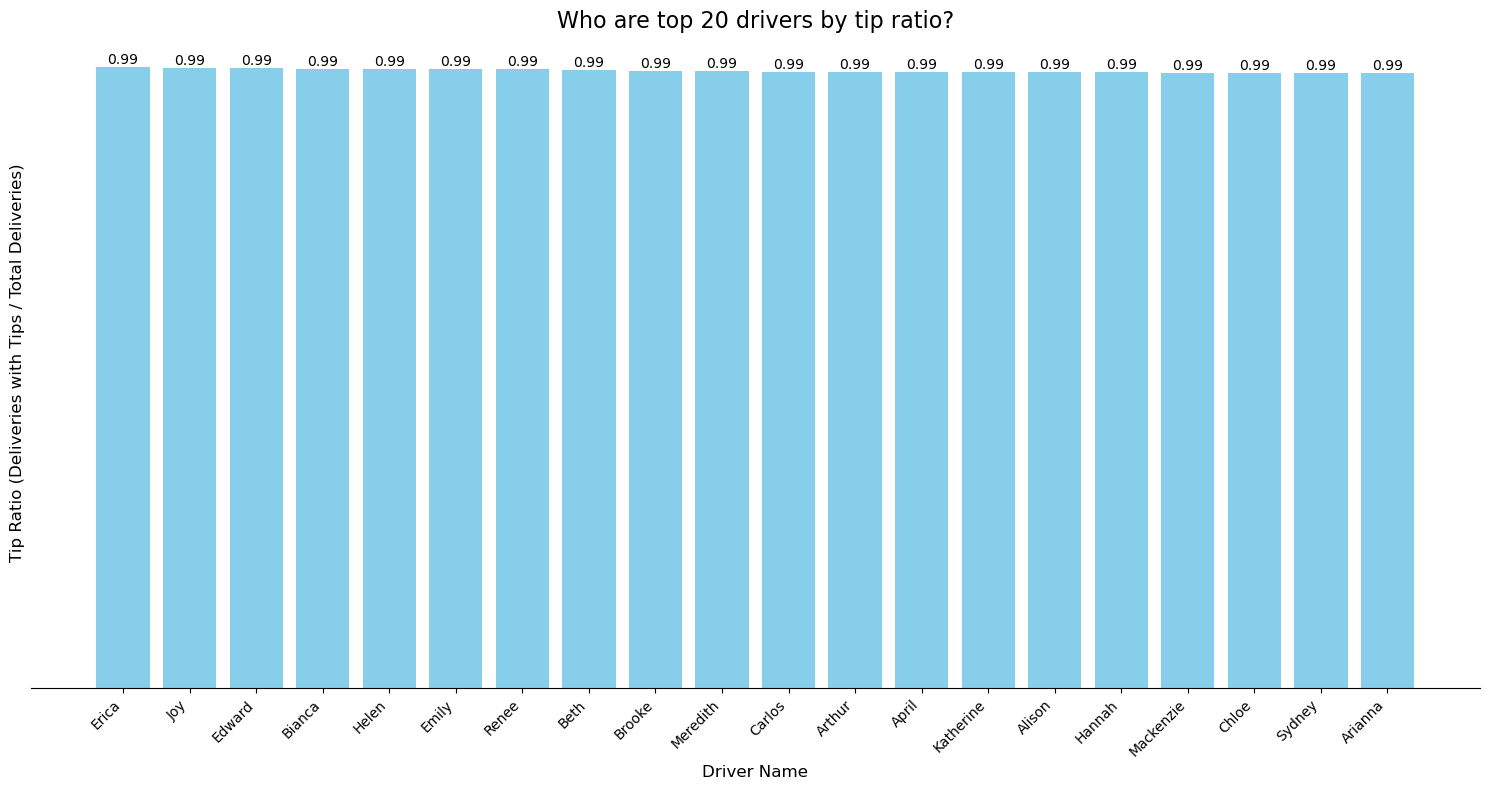

In [71]:
top_20_drivers = driver_tip_ratio.sort_values('Tip Ratio', ascending=False).head(20)

plt.figure(figsize=(15, 8))
bars = plt.bar(top_20_drivers.index, top_20_drivers['Tip Ratio'], color='skyblue')

plt.title('Who are top 20 drivers by tip ratio?', fontsize=16)
plt.xlabel('Driver Name', fontsize=12)
plt.ylabel('Tip Ratio (Deliveries with Tips / Total Deliveries)', fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.gca().yaxis.set_ticks([])  
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

<h3 style="color:lightskyblue">Insight:</h3>
<h4>Different driver are performing top on different metric. So considering tip ratio as key metric. Top 20 drivers have same ratio.</h4>

### Restaurant analysis

In [73]:
restaurant_sales = df.groupby(['Restaurant ID']).agg({'sales':'sum'}).sort_values('sales', ascending=False)[:20]
restaurant_delivery_time = df.groupby(['Restaurant ID']).agg({'time_taken_to_deliver':'mean'}).sort_values('time_taken_to_deliver')[:20]
restaurant_delivery_count  = df.groupby(['Restaurant ID']).agg({'Customer ID':'count'}).sort_values('Customer ID', ascending=False)[:20]

<Figure size 2000x800 with 0 Axes>

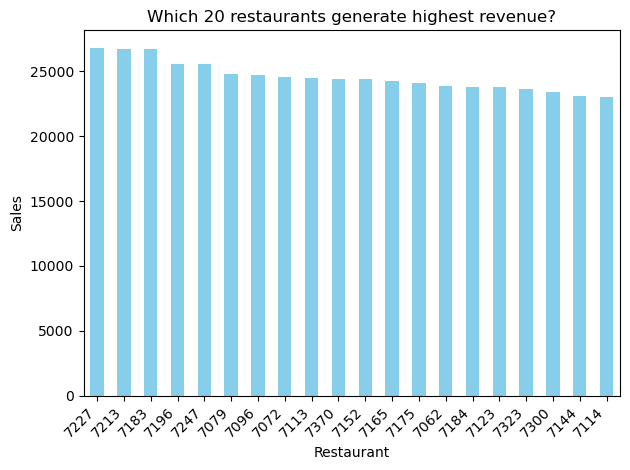

In [74]:
plt.figure(figsize=(20, 8))
restaurant_sales.plot(kind='bar', color='skyblue',legend=False)
plt.title('Which 20 restaurants generate highest revenue?')
plt.xlabel('Restaurant')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

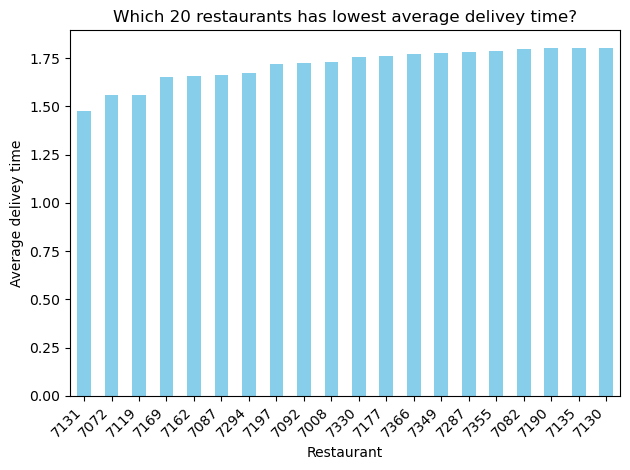

In [75]:
plt.figure(figsize=(20, 8))
restaurant_delivery_time.plot(kind='bar', color='skyblue',legend=False)
plt.title('Which 20 restaurants has lowest average delivey time?')
plt.xlabel('Restaurant')
plt.ylabel('Average delivey time')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

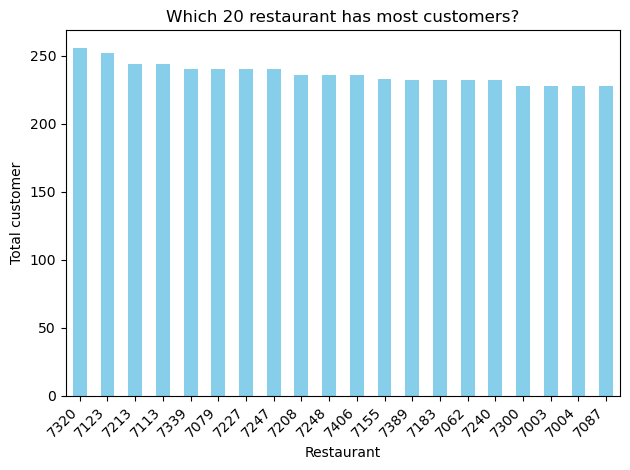

In [76]:
plt.figure(figsize=(20, 8))
restaurant_delivery_count.plot(kind='bar', color='skyblue',legend=False)
plt.title('Which 20 restaurant has most customers?')
plt.xlabel('Restaurant')
plt.ylabel('Total customer')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [77]:
restaurant_avg_order = df.groupby('Restaurant ID').agg({'sales':'sum','Customer ID': 'count'})
restaurant_avg_order.rename(columns={'Customer ID': 'Number of customer'}, inplace=True)
restaurant_avg_order['Average order value'] = restaurant_avg_order['sales'] / restaurant_avg_order['Number of customer']

In [78]:
restaurant_avg_order.sort_values('Average order value', ascending=False).head(20)

,sales,Number of customer,Average order value
Restaurant ID,,,
7098,18508.18,136,136.089559
7165,24258.86,196,123.769694
7061,17287.94,140,123.485286
7360,20348.31,168,121.120893
7067,21271.90,176,120.863068
7322,12078.30,100,120.783000
7284,18815.99,156,120.615321
7139,19691.70,164,120.071341
7170,21097.89,176,119.874375


<h3 style="color:lightskyblue">Insight:</h3>
<h4>Different restaurants are performing top in different metrics. So taking average order value as key metric. Restaurant 7098 has the highest average order value. </h4> >

### Delivery Area  Analysis

In [82]:
area_sales = df.groupby(['Delivery Area']).agg({'sales':'sum'}).sort_values('sales', ascending=False)
area_delivery_time = df.groupby(['Delivery Area']).agg({'time_taken_to_deliver':'mean'}).sort_values('time_taken_to_deliver')
area_delivery_count  = df.groupby(['Delivery Area']).agg({'Customer ID':'count'}).sort_values('Customer ID', ascending=False)

In [ ]:
plt.figure(figsize=(20, 8))
area_sales.plot(kind='bar', color='skyblue',legend=False)
plt.title('Which is the breakdown of city by revenue?')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
area_delivery_time.plot(kind='bar', color='skyblue',legend=False)
plt.title('What is the breakdown of city by average delivery time?')
plt.xlabel('City')
plt.ylabel('Average delivery time')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
area_delivery_count.plot(kind='bar', color='skyblue',legend=False)
plt.title('What is the breakdown of city by number of customer?')
plt.xlabel('City')
plt.ylabel('Total Customer')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [ ]:
area_avg_order = df.groupby('Delivery Area').agg({'sales':'sum','Customer ID': 'count'})
area_avg_order.rename(columns={'Customer ID': 'Number of customer'}, inplace=True)
area_avg_order['Average order value'] = area_avg_order['sales'] / area_avg_order['Number of customer']

In [ ]:
area_avg_order.sort_values('Average order value', ascending=False).head(20)

<h3 style="color:lightskyblue">Insight:</h3>
<h4>All cities have almost similar performance by different metrics.
</h4>

<h3 style="color:lightskyblue">RECOMMENDATION</h3>
<li>Optimize delivery times through route planning and driver training.</li>
<li>Implement a driver mentorship program based on high-performing drivers' practices.</li>
<li>Partner closely with high-value restaurants to increase average order values.</li>
<li>Encourage upselling and combo meals to increase average order values.</li>
<li>Optimize discount strategies to maximize sales while minimizing revenue loss.</li>
<li>Analyze and address refund patterns to minimize revenue loss.
</liBla</Develop city-specific marketing strategies to boost local performance.
<li>Bla</Enhance customer loyalty programs with personalized, tiered rewards.
<li>Bla</li>